In [ ]:
import torch
import torchvision
from torchvision import transforms

image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(
    root=image_path,train=True,transform=transform,download=True
)
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset,torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset,torch.arange(10000,len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(
    root=image_path,train=False,transform=transform,download=False
)

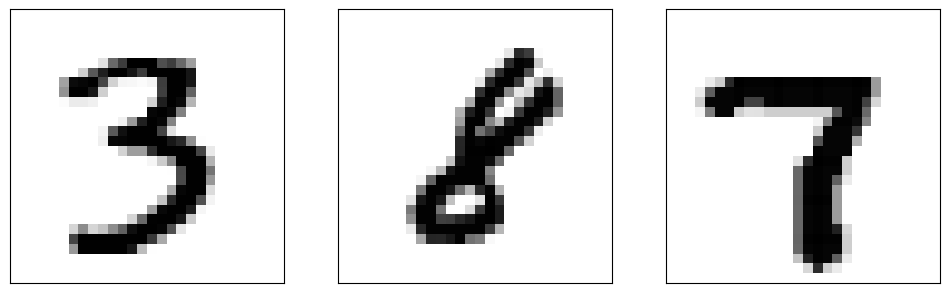

In [ ]:
#visualizamos algunas muestras del dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
for i in range(3):
  eje = fig.add_subplot(1,3,i+1)
  eje.set_xticks([])
  eje.set_yticks([])
  img = mnist_train_dataset[i][0][0,:,:]
  eje.imshow(img,cmap='gray_r')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
batch_size = 100
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset,batch_size,shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset,batch_size,shuffle=False)

In [ ]:
import torch.nn as nn

model1 = nn.Sequential()
model1.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1,out_channels=16,
        kernel_size=5,padding=2
    )
)
model1.add_module('relu1',nn.ReLU())
#en la capa pool kernel_size=2 y por default stride=2
model1.add_module('pool1',nn.MaxPool2d(kernel_size=2))
model1.add_module(
    'conv2',
    nn.Conv2d(
        in_channels=16,out_channels=32,
        kernel_size=5,padding=2
    )
)
model1.add_module('relu2',nn.ReLU())
model1.add_module('pool2',nn.MaxPool2d(kernel_size=2))
model1.add_module('flatten',nn.Flatten())
x=torch.ones((4,1,28,28))
model1(x).shape

torch.Size([4, 1568])

In [ ]:
model1.add_module('fc1',nn.Linear(1568,512))
model1.add_module('relu3',nn.ReLU())
model1.add_module('dropout',nn.Dropout(p=0.5))
model1.add_module('fc2',nn.Linear(512,10))

In [ ]:
model2 = nn.Sequential()
model2.add_module(
    'conv1',
    nn.Conv2d(
        in_channels=1,out_channels=4,
        kernel_size=5,padding=2
    )
)
model2.add_module('relu1',nn.ReLU())
#en la capa pool kernel_size=2 y por default stride=2
model2.add_module('pool1',nn.MaxPool2d(kernel_size=2))

model2.add_module('flatten',nn.Flatten())
x=torch.ones((4,1,28,28))
model2(x).shape

torch.Size([4, 784])

In [ ]:
model2.add_module('fc1',nn.Linear(784,64))
model2.add_module('relu3',nn.ReLU())
#model2.add_module('dropout',nn.Dropout(p=0.5))
model2.add_module('fc2',nn.Linear(64,10))

In [ ]:

loss_fn = nn.CrossEntropyLoss()


def train(model, num_epochs,train_dl,valid_dl,lr):
  optimizer = torch.optim.Adam(model.parameters(),lr=lr)
  loss_hist_train = [0 for i in range(num_epochs)]
  accuracy_hist_train = [0 for i in range(num_epochs)]
  loss_hist_valid = [0 for i in range(num_epochs)]
  accuracy_hist_valid = [0 for i in range(num_epochs)]
  for epoch in range(num_epochs):
    model.train()
    for x_batch,y_batch in train_dl:
      optimizer.zero_grad()
      pred = model(x_batch)
      loss = loss_fn(pred,y_batch)
      loss.backward()
      optimizer.step()
      loss_hist_train[epoch] += loss.item()*y_batch.size(0)
      is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
      accuracy_hist_train[epoch] += is_correct.sum()
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)

    model.eval()
    with torch.no_grad():
      for x_batch,y_batch in valid_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.sum()
    loss_hist_valid[epoch] /= len(valid_dl.dataset)
    accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

    print(f'Epoch {epoch+1} accuracy: '
          f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
          f'{accuracy_hist_valid[epoch]:.4f}')
  return loss_hist_train,loss_hist_valid,accuracy_hist_train,accuracy_hist_valid




In [ ]:
import time
torch.manual_seed(1)
num_epochs = 20
lr = 0.001
start_time=time.perf_counter()
hist = train(model1,num_epochs,train_dl,valid_dl,lr)
end_time=time.perf_counter()
print('Training time: ', end_time-start_time)

Epoch 1 accuracy: 0.9245 val_accuracy: 0.9763
Epoch 2 accuracy: 0.9782 val_accuracy: 0.9831
Epoch 3 accuracy: 0.9843 val_accuracy: 0.9859
Epoch 4 accuracy: 0.9876 val_accuracy: 0.9872
Epoch 5 accuracy: 0.9895 val_accuracy: 0.9871
Epoch 6 accuracy: 0.9909 val_accuracy: 0.9881
Epoch 7 accuracy: 0.9931 val_accuracy: 0.9891
Epoch 8 accuracy: 0.9937 val_accuracy: 0.9885
Epoch 9 accuracy: 0.9943 val_accuracy: 0.9882
Epoch 10 accuracy: 0.9950 val_accuracy: 0.9898
Epoch 11 accuracy: 0.9954 val_accuracy: 0.9904
Epoch 12 accuracy: 0.9960 val_accuracy: 0.9903
Epoch 13 accuracy: 0.9957 val_accuracy: 0.9905
Epoch 14 accuracy: 0.9969 val_accuracy: 0.9912
Epoch 15 accuracy: 0.9964 val_accuracy: 0.9880
Epoch 16 accuracy: 0.9964 val_accuracy: 0.9902
Epoch 17 accuracy: 0.9975 val_accuracy: 0.9915
Epoch 18 accuracy: 0.9976 val_accuracy: 0.9912
Epoch 19 accuracy: 0.9974 val_accuracy: 0.9905
Epoch 20 accuracy: 0.9973 val_accuracy: 0.9895
Training time:  1082.130697608


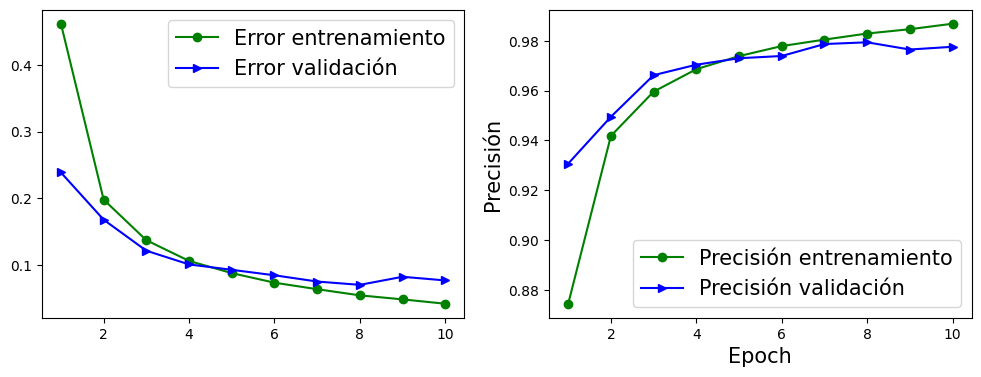

In [ ]:
import numpy as np

x_arr = np.arange(len(hist[0]))+1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr,hist[0],'-o',color='g',label='Error entrenamiento')
ax.plot(x_arr,hist[1],'->',color='b',label='Error validación')
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr,hist[2],'-o',color='g',label='Precisión entrenamiento')
ax.plot(x_arr,hist[3],'->',color='b',label='Precisión validación')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch',size=15)
ax.set_ylabel('Precisión',size=15)
plt.show()


In [ ]:
pred = model2(mnist_test_dataset.data.unsqueeze(1)/255.)
is_correct = (torch.argmax(pred,dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')


Test accuracy: 0.9798


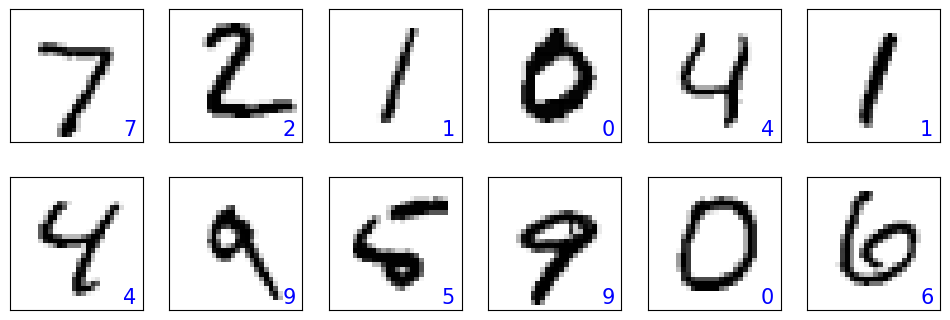

In [ ]:
fig = plt.figure(figsize=(12,4))
for i in range(12):
  ax = fig.add_subplot(2,6,i+1)
  ax.set_xticks([]);ax.set_yticks([])
  img = mnist_test_dataset[i][0][0,:,:]
  pred = model2(img.unsqueeze(0).unsqueeze(1))
  y_pred = torch.argmax(pred)
  ax.imshow(img,cmap='gray_r')
  ax.text(0.9,0.1,y_pred.item(),
          size=15,color='blue',
          horizontalalignment='center',
          verticalalignment='center',
          transform=ax.transAxes)
plt.show()